                  Crysern Smith - 21035961 - Term 3 - 21/22 Personalisation and Machine Learning

Brief:
Using an existing dataset, try and improve the quality and accuracy of recommendations using a machine learning approach.


**Movie Lens Small Latest Dataset**

https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset

We will inspect three models of recommendations
1. Content filtering recommendation

2. Collaborative filtering recommendation

3. Hybrid recommendation

To honestly evaluate the accuracy, the same movie dataset needs to be measured in all forms of models available; due to my restrictions on recommender model creation, the below are basic versions.

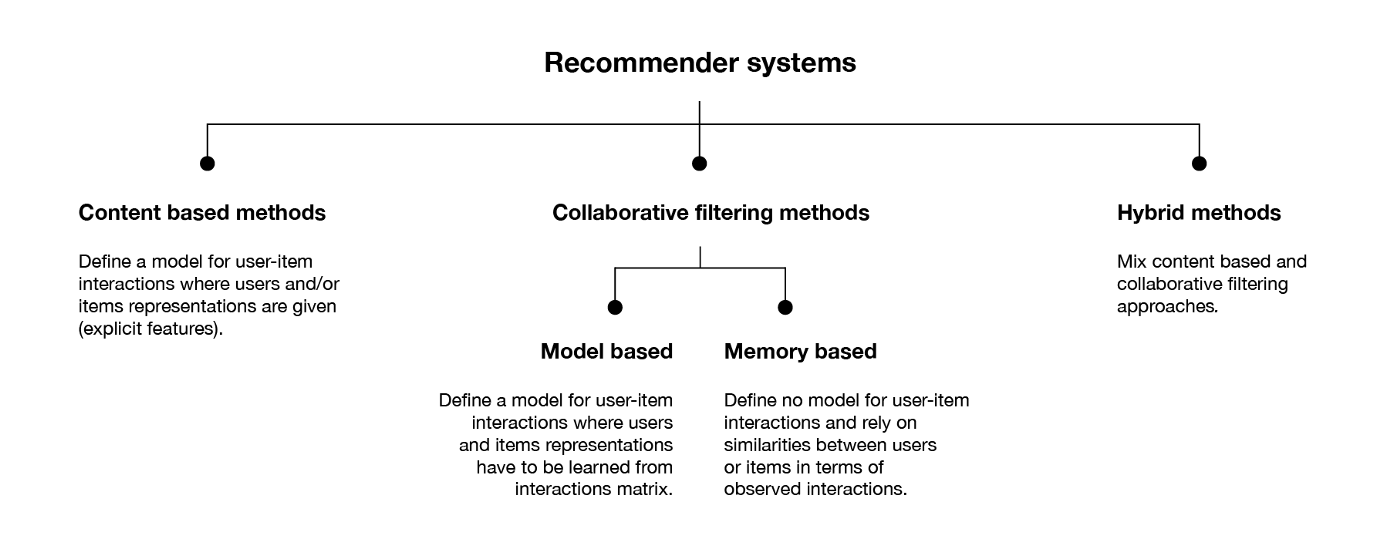


## What are recommender systems:

Recommender systems are a form of information filtering used based on predicting a user's preference. Many everyday platforms, such as streaming platforms, use recommender systems.
These companies can then provide better or more personalised content, service and products to the user.

Recommender systems typically produce a list of recommendations through content-based, collaborative filtering, and now, a version that contains both is called a hybrid recommendation.

An example of a recommender system providing accurate results is that of amazon. They use item-item collaborative filtering and produce great results.

References:

https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada

https://www.analyticssteps.com/blogs/what-are-recommendation-systems-machine-learning

**Outline**

1. Load the dataset

2. Data Analysis

3. Data Cleaning and Merging

4. Content based filtering

5. Collabrative filtering

6. A synopsis of hybrid filtering(theoretical)

7. Conclusion and Further study


In [24]:
#https://github.com/ngezler/Implementation-of-Movie-Recommender-System/blob/master/SY_1_Unsupervised_Notebook.ipynb
#Load all libraries needed
#https://github.com/numpy/numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import math
warnings.filterwarnings('ignore')

# Load the dataset

In [58]:
#https://www.kaggle.com/competitions/edsa-movie-recommendation-challenge/data
movies =  pd.read_csv('../Term 3 - Personalisation - Mini Project/movies.csv')
ratings = pd.read_csv('../Term 3 - Personalisation - Mini Project/ratings.csv')

# Data analysis

In [59]:
#https://git.arts.ac.uk/lmccallum/personalisation-21-22/blob/master/Week%204.1%20-%20Embeddings.ipynb
#Take a look at the dataset uploaded
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
#https://git.arts.ac.uk/lmccallum/personalisation-21-22/blob/master/Week%204.1%20-%20Embeddings.ipynb
#read the ratings dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [32]:
#https://github.com/nikitaa30/Recommender-Systems/blob/master/knn_recommender.ipynb
#https://git.arts.ac.uk/lmccallum/personalisation-21-22/blob/master/Week%204.1%20-%20Embeddings.ipynb

#Analyse users and Movies available for analyses in dataset
num_users = len(ratings.userId.unique())
num_items = len(ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 668 unique users and 10325 unique movies in this data set


In [33]:
#https://git.arts.ac.uk/lmccallum/personalisation-21-22/blob/master/Week%204.1%20-%20Embeddings.ipynb
#https://keras.io/examples/structured_data/collaborative_filtering_movielens/

ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
108,1,48780,4.0,1217897632
109,1,49272,3.5,1217896576
110,1,52973,3.5,1217897820
111,1,54286,4.0,1217896447


In [34]:
#https://akzalk.github.io/module_1_final_project
#https://github.com/lingualytics/py-lingualytics/issues/1
genres_list=[]
for genre in movies.genres:
    
    x=str(genre).split('|')
    for i in x:
         if i not in genres_list:
            genres_list.append(str(i))
            
genres=str(genres_list)    
genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

In [35]:
#https://akzalk.github.io/module_1_final_project
#https://github.com/lingualytics/py-lingualytics/issues/1
movie_title=[]

for title in movies.title:
    movie_title.append(title[0:-7])
    
movie_title=str(movie_title)  
print(movie_title)

['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'GoldenEye', 'American President, The', 'Dracula: Dead and Loving It', 'Balto', 'Nixon', 'Cutthroat Island', 'Casino', 'Sense and Sensibility', 'Four Rooms', 'Ace Ventura: When Nature Calls', 'Money Train', 'Get Shorty', 'Copycat', 'Assassins', 'Powder', 'Leaving Las Vegas', 'Othello', 'Now and Then', 'Persuasion', 'City of Lost Children, The (Cité des enfants perdus, La)', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Dangerous Minds', 'Twelve Monkeys (a.k.a. 12 Monkeys)', 'Wings of Courage', 'Babe', 'Carrington', 'Dead Man Walking', 'Clueless', 'Cry, the Beloved Country', 'Richard III', 'Dead Presidents', 'Restoration', 'Mortal Kombat', 'To Die For', 'How to Make an American Quilt', 'Seven (a.k.a. Se7en)', 'Pocahontas', 'When Night Is Falling', 'Usual Suspects, The', 'Mighty Aphrodite', 'Lamerica', 'Big Green, The', 'Georgia', 'Home f

In the dataset, many of the average ratings are not sorted, which reduces the quality of our recommender, so libraries such as merge, .groupby, and sort can help clean up the data for better and more accurate representation, as you can see below.

The issue, however, when sorting the ratings, it is not a clear indication of facts, one user can rate a movie five stars and get pushed to the top of the pile if we are going by just ratings, but if we go by an average amount of users and ratings, then this can tell us what movies are highly ranked or not. So the code below helps us sort, merge groups and arrange all values accordingly to show an accurate dataset representation, which helps create a better quality dataset.


In [36]:
#https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/
#https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

#Clean and prepare data, by grouping, merging and sorting the values to create a more cohesive datase
#For the purpose of the assignment i have not printed out each of the below.
df=pd.merge(ratings,movies, how='left',on='movieId')

average_rating = df.groupby('title')[['rating']].mean()
average_rating.sort_values('rating', inplace = True)
average_rating[average_rating['rating'] == 5]

total_rating = df.groupby(['title'])[['rating']].count()
total_rating.sort_values('rating', inplace = True)

Data visualisation of clean data.

<BarContainer object of 10 artists>

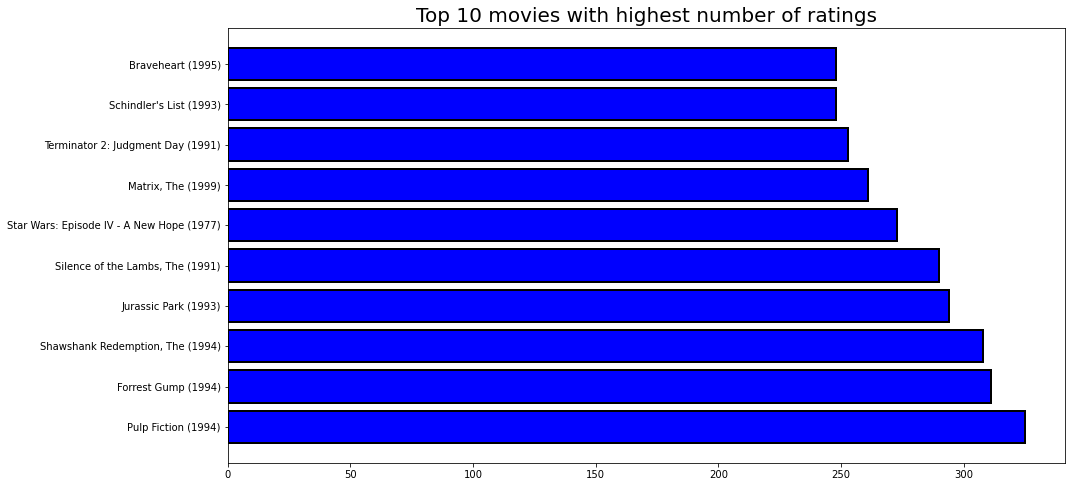

In [37]:
#https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/
##https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/
#https://www.w3schools.com/python/matplotlib_bars.asp

total_rating.sort_values('rating', inplace = True)
total_rating = total_rating.nlargest(10,'rating')
plt.figure(figsize = (15,8))
plt.title('Top 10 movies with highest number of ratings', fontsize = 20)
plt.barh(total_rating.index, total_rating['rating'], edgecolor = 'k', linewidth = 2, color = 'blue')

# Content  Based Filtering

In the industry of recommender systems, many can perform to a significant level of accuracy. However, to understand the level of accuracy needed, we need to compare content vs collaboration since both are the most popular among more prominent companies.

Content-based filtering is more of an insulated recommender system and requires active engagement from every user.
Content-based filtering relies on keywords and attributes in the database and matching recommendations based on the user's previous ratings.

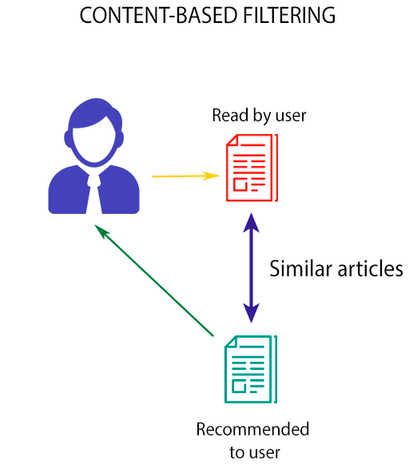

Image Source:
https://www.researchgate.net/figure/Content-based-filtering-vs-Collaborative-filtering-Source_fig5_323726564

Futher reading :

https://medium.com/analytics-vidhya/how-to-do-a-content-based-filtering-using-tf-idf-f623487ed0fd

https://www.analyticssteps.com/blogs/what-content-based-recommendation-system-machine-learning 

Within the library of sklearn we will use TfidfVectorizer, due to the some aspects within the dataset we will need to specify the n-grams within a range.

Reference:

https://medium.com/analytics-vidhya/how-to-do-a-content-based-filtering-using-tf-idf-f623487ed0fd

https://medium.com/@shengyuchen/how-tfidf-scoring-in-content-based-recommender-works-5791e36ee8da#:~:text=TFIDF%20score%20is%20used%20mainly,dampen%20the%20high%20frequency%20weight.

In [38]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vect = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = vect.fit_transform(movies['genres'])
tfidf_matrix.shape

(10329, 178)

The cosine similarity is a popular metric. The following step will be to look for similar tf-idf vectors (movies). We've encoded the genre of each film into a tf-idf representation; now, we need to define the proximity measure.

In [39]:
#https://stackoverflow.com/questions/6255835/cosine-similarity-and-tf-idf
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.linear_kernel.html
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.31264191, 0.06379193, 0.05620082],
       [0.31264191, 1.        , 0.        , 0.        ],
       [0.06379193, 0.        , 1.        , 0.35557273],
       [0.05620082, 0.        , 0.35557273, 1.        ]])

In [40]:
#https://github.com/kavya-yerrabandi/MovieRecommendationSystem
#We can now build our recommender and see the results below
indices = pd.Series(movies.index,index=movies['title'])
movie_titles = movies['title']
def recommendations(movie_title):
    idx = indices[movie_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    for similar_movies in movie_titles.iloc[movie_indices]:
      print(similar_movies)

In [43]:
##https://github.com/kavya-yerrabandi/MovieRecommendationSystem
recommendations('Toy Story (1995)')

Antz (1998)
Toy Story 2 (1999)
Adventures of Rocky and Bullwinkle, The (2000)
Emperor's New Groove, The (2000)
Monsters, Inc. (2001)
DuckTales: The Movie - Treasure of the Lost Lamp (1990)
Wild, The (2006)
Shrek the Third (2007)
Tale of Despereaux, The (2008)
Asterix and the Vikings (Astérix et les Vikings) (2006)


**Recommendation breakdown:** 

*Toy Story Genre - Comedy, Adventure, Fantasy*

*Antz Genre - Adventure, Comedy, Fantasy*

*Adventures of Rocky and Bullwinkle, The  Genre - Comedy, Adventure*

As you can see, based on one input that I extracted from the movies dataset, the recommendation is pretty good. All of the movies are labelled with the above genre. But one insight is that they are also all animated and are traditionally considered to be within the children's film genre.

This information was not provided in the dataset, so there is a good level of accuracy in a content-based model.

However, with content-based filtering, it is easier for the recommendations to be made, there is much more transparency in your suggestions, and you, as the viewer, everything is insulated—your choice. You are in control of the outcome. In contrast, collaborative filtering is precisely that, and you would need to collaborate with many others, including companies, to get newer and even more diverse movie recommendations. 

Futher exploration: 

Acquire a larger dataset

Below is an article with great insight into why contenct based filtering might not be the right choice for this particular task, but is an area:

https://www.upwork.com/resources/what-is-content-based-filtering

# Collaborative Filtering

Collaborative filtering is precisely what it means. It is a collaboration and requires many users to provide their input. It will then use a process of matching people's similar interests and make recommendations as a whole to either people within the exact geo-location, same likes and interests and same previously watched content.

In a nutshell, it is about casting a wide net strung together by various people hoping that like-minded individuals will be drawn and caught within it when it is thrown.

Collabrative filtering has one considerable limitation in its approach, and that is, it relies on the user's ratings, and if not all users are rating movies, it means we will have been given a cold start which is a common problem in the industry. However, major companies have overcome this challenge, which we will discuss later.


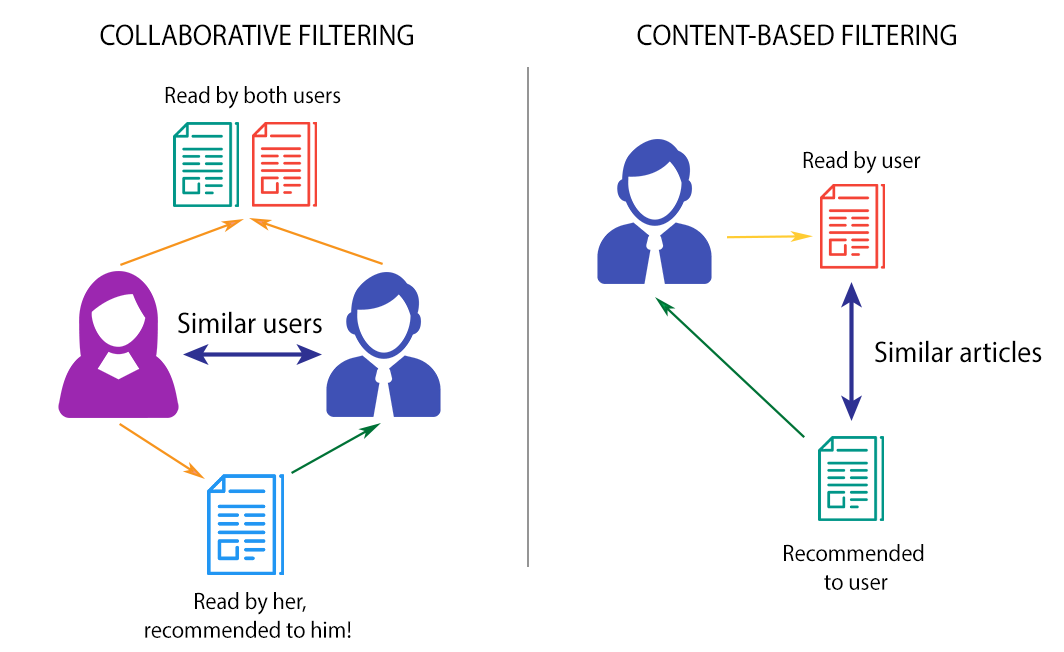

Reference:

https://towardsdatascience.com/brief-on-recommender-systems-b86a1068a4dd

Reference:

https://towardsdatascience.com/limitations-of-collaborative-recommender-systems-9801036941b3

In [46]:
#https://git.arts.ac.uk/lmccallum/personalisation-21-22/blob/master/Week%204.1%20-%20Embeddings.ipynb
# Read movies data
movies_df = pd.read_csv('movies.csv')
# Read ratings data
ratings_df = pd.read_csv('ratings.csv')

In [47]:
#https://amanmander123.github.io/collaborative-filtering-based-recommendation-system.html
#https://github.com/mdh266/RecommenderSystems/blob/master/Recommender.ipynb
#https://github.com/klaudia-nazarko/collaborative-filtering-python/blob/master/collaborative-filtering-model-based.ipynb

#The movies and ratings tables need to be joined
movies_ratings_df = pd.merge(movies_df, ratings_df, on = 'movieId')

#Timestamp column will be removed
del movies_ratings_df['timestamp']

#View newly created table
movies_ratings_df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0


We then generate a pivot table with the values as the ratings, the movie titles as the rows and the user IDs as the columns.

The use of pivot tables is generally considered a powerful tool in analysing your data, it does a great job combining and summarising, and the loss of data is minimal.

Why pivot tables:

https://www.youtube.com/watch?v=ETQXKwM6YMY

https://regenerativetoday.com/use-of-pivot-table-in-pandas/

In [48]:
#https://amanmander123.github.io/collaborative-filtering-based-recommendation-system.html
#https://github.com/mdh266/RecommenderSystems/blob/master/Recommender.ipynb
#https://github.com/klaudia-nazarko/collaborative-filtering-python/blob/master/collaborative-filtering-model-based.ipynb

# Convert movieId, userId and rating to numeric
movies_ratings_df[['movieId','userId','rating']] = movies_ratings_df[['movieId','userId','rating']].apply(pd.to_numeric)

# Convert table to pivot table
movies_ratings_pivot = movies_ratings_df.pivot_table(values = 'rating', index = 'title', columns = 'userId')  

# Replace NaNs with 0s
movies_ratings_pivot.fillna(0, inplace = True)

# Display first few rows and columns of movies and ratings pivot table
movies_ratings_pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We will need to see the correlation/relationship between movies and ratings, and to do this; we will need to use a correlation matrix with the help of our pivot table. It will do this by determining how one variable linearly changes to another.

If a user likes a movie, we can take the column of that movie, find the correlation between that and all other films within that column, and then provide the ones with the strongest correlation.

This mathematical method helps will the recommender to accurately churn out recommendations based on the information it has provided.


Reference:
https://medium.com/analytics-vidhya/simple-movie-recommender-system-with-correlation-coefficient-with-python-e6cb31dae01e

In [49]:
#https://amanmander123.github.io/collaborative-filtering-based-recommendation-system.html
#https://github.com/mdh266/RecommenderSystems/blob/master/Recommender.ipynb
#https://github.com/klaudia-nazarko/collaborative-filtering-python/blob/master/collaborative-filtering-model-based.ipynb

#Extract and save movie titles
movie_titles = movies_ratings_pivot.index

#Get the correlation between movies
corr_matrix = np.corrcoef(movies_ratings_pivot)

# View correlation matrix
corr_matrix

array([[ 1.        , -0.00149925, -0.00149925, ..., -0.00362374,
         0.09197155, -0.00149925],
       [-0.00149925,  1.        , -0.00149925, ..., -0.00362374,
         0.14251618, -0.00149925],
       [-0.00149925, -0.00149925,  1.        , ..., -0.00362374,
         0.09197155,  1.        ],
       ...,
       [-0.00362374, -0.00362374, -0.00362374, ...,  1.        ,
         0.02851448, -0.00362374],
       [ 0.09197155,  0.14251618,  0.09197155, ...,  0.02851448,
         1.        ,  0.09197155],
       [-0.00149925, -0.00149925,  1.        , ..., -0.00362374,
         0.09197155,  1.        ]])

In [50]:
#https://amanmander123.github.io/collaborative-filtering-based-recommendation-syste.html
#https://github.com/mdh266/RecommenderSystems/blob/master/Recommender.ipynb
#https://github.com/klaudia-nazarko/collaborative-filtering-python/blob/master/collaborative-filtering-model-based.ipynb

# Define function provide top recommendations
def recommender(movie_names):  
    # Initialize recommendations output length of number of movies
    recommendations = np.zeros(corr_matrix.shape[0])
    # Loop through the movie titles that the user has rated
    for movie in movie_names:
        # Sum the correlations
        recommendations = recommendations + corr_matrix[list(movie_titles).index(movie)]
    # Convert recommendations into dataframe
    recommendations_df = pd.DataFrame({
            'Title': movie_titles,
            'Recommendation': recommendations})
    # Remove movie titles that the user has already rated
    recommendations_df = recommendations_df[~(recommendations_df.Title.isin(movie_names))]
    # Sort from most correlated to least correlated
    recommendations_df = recommendations_df.sort_values(by=['Recommendation'], ascending = False)
    return recommendations_df

In [62]:
#https://amanmander123.github.io/collaborative-filtering-based-recommendation-system.html
#https://github.com/mdh266/RecommenderSystems/blob/master/Recommender.ipynb
#https://github.com/klaudia-nazarko/collaborative-filtering-python/blob/master/collaborative-filtering-model-based.ipynb

# Define user
user = 20

#Find the list of movies user has rated, I have chosen to only list the top ten movies
user_movies = movies_ratings_df[movies_ratings_df.userId == user].title.tolist()  
print('Movies rated by user\n')
print(user_movies[:10])

#Get list of recommendations
recommendations = recommender(user_movies)

#Print out top 10 recommendations
print('\nRecommendations for user\n')
print(recommendations.Title.head(10))

Movies rated by user

['Father of the Bride (1950)', 'Old Yeller (1957)', 'Parent Trap, The (1961)', 'Shall We Dance? (Shall We Dansu?) (1996)', 'Misérables, Les (1998)', 'Freaky Friday (1977)', 'Pretty in Pink (1986)', 'Clue (1985)', 'War of the Worlds, The (1953)', 'Pelican Brief, The (1993)']

Recommendations for user

9375                Town, The (2010)
2803                   Easy A (2010)
1323     Bourne Identity, The (2002)
1326    Bourne Ultimatum, The (2007)
9777                   WALL·E (2008)
3944            Hangover, The (2009)
4440          I Love You, Man (2009)
1202            Blood Diamond (2006)
9856                 Watchmen (2009)
2577               District 9 (2009)
Name: Title, dtype: object


**Recommendation breakdown:**

The user we have chosen, was at random and below are the recommendations for that user based on the process of collaboration.

The users preferences:

Father of the Bride (1950) Genre - Romance, Comedy, Drama

*Old Yeller (1957) Genre - Drama, Western, Adventure*

*Parent Trap, The (1961) Genre - Romance, Comedy, Romantic comedy*

Collabrative filtering recommendations:

From highest rating to lowest and based on our users preference.

*Town, The (2010) Genre - Heist, Crime, Drama, Thriller*

*Easy A (2010) Genre - Comedy, Drama, Romance, Romantic comedy*

*Bourne Identity, The (2002) - Adventure, Action Thriller, Drama*


In terms of diversity and novelty, you are provided with a rich panoply of choices.
Each recommendation is not like the other but hits the mark in terms of keeping your user engaged and on your platform.

Netflix, Youtube, Tiktok and many other video streaming services rely heavily on collabrative filtering recommendations.

Now, for the final version of a recommender system which is a hybrid filtering system.

![image-2.png](https://miro.medium.com/max/1400/0*cLY1YieFAoqGPhw6)

Image Reference:

https://medium.com/sciforce/inside-recommendations-how-a-recommender-system-recommends-9afc0458bd8f

Combining collaborative and content-based filtering may help overcome the limitations we face when using them separately, and it may also be more effective in some cases. We can implement hybrid recommender system approaches in various ways, such as generating predictions separately using content and collaborative methods, then combining the forecasts or simply adding collaborative-based method capabilities to a content-based approach (and vice versa).

Several studies compare the performance of conventional approaches to hybrid methods and conclude that using mixed methods results in more accurate recommendations.

References:

http://ceur-ws.org/Vol-676/paper2.pdf

https://www.researchgate.net/publication/221306167_A_Scalable_Accurate_Hybrid_Recommender_System

https://analyticsindiamag.com/a-guide-to-building-hybrid-recommendation-systems-for-beginners/




# Conclusion

The methods used to improve quality and accuracy range from data merging and pivoting, cosine similarity, Pearson correlation, TFIDF and a few others to improve the accuracy and quality of the recommenders.

The question of your recommender's quality and accuracy depends on its usage. Companies such as IMDB, Rotten tomatoes, and pandora use content filtering, while others like Amazon, Google, Twitter, LinkedIn, Spotify and much more use collaborative filtering. And the most prominent user and most successful user of hybrid filtering are Netflix, which has invested over $150 million each year to improve functionality.

Using the well-known movie dataset, exploring different recommendation systems has included Collaborative Filtering, Content-Based Filtering and Hybrid recommendation systems(in theory). Conducting a mixed analysis quantitatively and qualitatively comes from the need that content-Based Filtering systems cannot be easily quantifiable. 

Also, the qualitative approach holds much importance for a movie recommendation system. That is why the method of evaluation follows the more traditional path.

Reference:

https://techcrunch.com/2015/09/28/the-evolving-landscape-of-recommendation-systems/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAASh3FMAeydwxSRbpQ8wM_0CvLQScxzJ5YOUzySl6OlP78lJHyfZ1qHMAR2me1yzno0jQJn2wTcou_g8PNlZAgtz4b6lLdNjxERkg1IGvI0kAhD1h8bbBwlqNxi0XIjHl_h_BGqfrVn3RB1sJPRQPrn8ebg3cdwSq_kWEkGQkfeM


**Further studies:**

There are opportunities for further analysis following this work. 

For example, demographic-based information about the user could significantly improve the accuracy of recommendations. However, considering this can add another layer of refinement to the hybrid recommendation system. 

Also, the Content-Based Filtering recommendation only had a few categories, such as genre. If the dataset included cast, crew, and reviews of the movies, this could provide further similarity. Furthermore, comparing different Collaborative Filtering based methods and similarity measures could be interesting. 


References for further study:


https://www.researchgate.net/publication/346218759_Improving_Accuracy_of_Recommender_Systems_using_Social_Network_Information_and_Longitudinal_Data

https://towardsdatascience.com/4-ways-to-supercharge-your-recommendation-system-aeac34678ce9

https://techcrunch.com/2015/09/28/the-evolving-landscape-of-recommendation-systems/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAASh3FMAeydwxSRbpQ8wM_0CvLQScxzJ5YOUzySl6OlP78lJHyfZ1qHMAR2me1yzno0jQJn2wTcou_g8PNlZAgtz4b6lLdNjxERkg1IGvI0kAhD1h8bbBwlqNxi0XIjHl_h_BGqfrVn3RB1sJPRQPrn8ebg3cdwSq_kWEkGQkfeM